# 🧠 Exploratory Data Analysis (EDA) – Fraud Detection

This notebook performs a comprehensive **exploratory data analysis** on the synthetic PaySim dataset.
The goal is to understand the structure of the data and identify patterns and insights that could help detect fraudulent transactions.

### Sections Covered:
- Dataset Overview
- Target Variable Distribution (`isFraud`)
- Transaction Type Analysis
- Amount and Balance Distributions
- Observations and Key Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 🔍 General Revision

In [2]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
print('✅ Data Imported!')

# 🔍 Checking the shape of the dataset: number of rows and columns
print("Dataset Shape (rows, columns):", data.shape)

# ℹ️ Basic structure: column names, non-null counts, and data types
data.info()

# 📊 Summary statistics for numerical columns
data.describe()

# 👁️ Preview the first five rows of the dataset
data.head()


✅ Data Imported!
Dataset Shape (rows, columns): (6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# 📏 Basic stats: number of rows, unique transaction types, and fraud counts

print('# of rows:', data.shape[0])
print('unique types:', data.type.unique())
print('flagged as fraud:', data.isFraud.sum())


# of rows: 6362620
unique types: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
flagged as fraud: 8213


In [4]:
# 🧼 Check for missing values in each column (as a percentage)

data.isnull().mean()

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

## 🎯 Distribution of the target variable `isFraud`

* The dataset is **highly imbalanced**, which is a typical characteristic in fraud detection problems. <br>
* This imbalance means that standard classifiers might be biased toward predicting the majority class (non-fraud). Special techniques like **SMOTE**, class weighting, or anomaly detection will be required later.

/var/folders/zf/wj_jktvx4jb2w0ylv97cdxyh0000gn/T/ipykernel_8174/3454664016.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fraud_dist, x='isFraud', y='Proportion', palette='Set2')


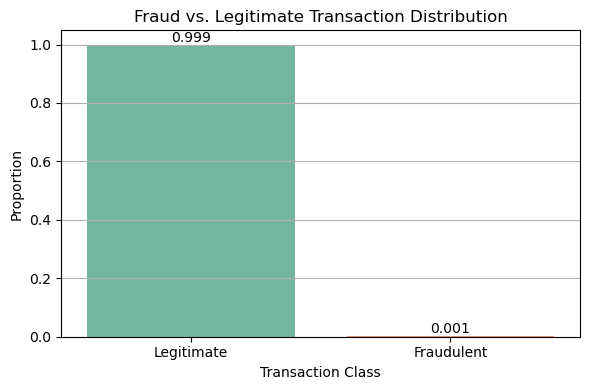

In [7]:
# 🎯 Distribution of the target variable `isFraud`

# Prepare the data for Seaborn
fraud_dist = data['isFraud'].value_counts(normalize=True).reset_index()
fraud_dist.columns = ['isFraud', 'Proportion']
fraud_dist['isFraud'] = fraud_dist['isFraud'].map({0: 'Legitimate', 1: 'Fraudulent'})

# Seaborn barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=fraud_dist, x='isFraud', y='Proportion', palette='Set2')

plt.title('Fraud vs. Legitimate Transaction Distribution')
plt.xlabel('Transaction Class')
plt.ylabel('Proportion')
plt.grid(axis='y')
plt.tight_layout()


# 🏷️ Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=10)
    
plt.show()

## 📊 Distribution of transaction types


* The most common transaction types are:
   `PAYMENT`, `CASH_OUT`, and `CASH_IN`.
* However, **fraud is highly concentrated in only two types**:
   `TRANSFER` and `CASH_OUT`
* Other types like `PAYMENT`, `DEBIT`, and `CASH_IN` show **no fraudulent activity** in the dataset.

 - 🔍 **Conclusion**: We can safely **filter out non-fraud-prone transaction types** in the modeling phase to reduce noise and improve classifier focus.

/var/folders/zf/wj_jktvx4jb2w0ylv97cdxyh0000gn/T/ipykernel_8174/66353359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, order=data['type'].value_counts().index, palette='Set2')


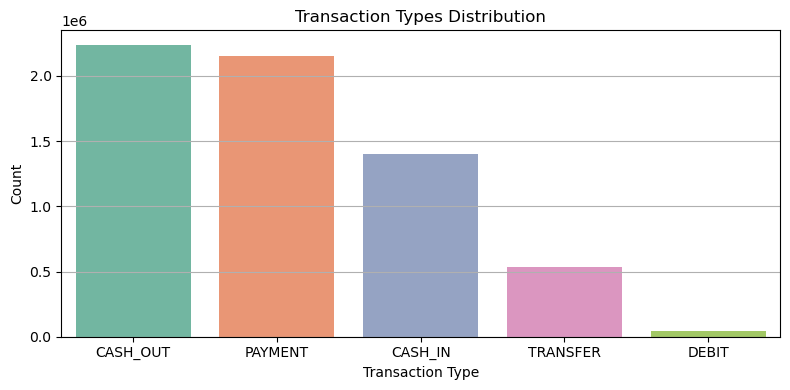

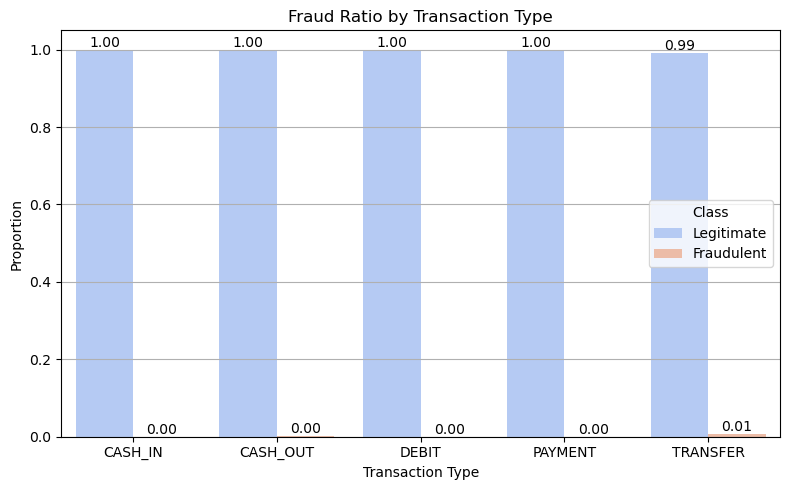

In [10]:
# Transaction type count using Seaborn
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=data, order=data['type'].value_counts().index, palette='Set2')
plt.title('Transaction Types Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Prepare data for stacked bar with Seaborn
fraud_ratio_by_type = pd.crosstab(data['type'], data['isFraud'], normalize='index')
fraud_ratio_by_type.columns = ['Legitimate', 'Fraudulent']
fraud_ratio_by_type = fraud_ratio_by_type.reset_index().melt(id_vars='type', var_name='Transaction', value_name='Proportion')

# Stacked bar using hue
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=fraud_ratio_by_type, x='type', y='Proportion', hue='Transaction', palette='coolwarm')

plt.title('Fraud Ratio by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Proportion')
plt.grid(axis='y')
plt.legend(title='Class')
plt.tight_layout()
# 🏷️ Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.show()


## 📊 Amount Distribution


- The majority of transactions involve **small to moderate amounts**, but there are **long tails** with very large amounts.
- A few transactions are in the range of **millions**, which could be potential frauds or high-risk activities.
- Using a **logarithmic scale on the Y-axis** helps visualize the skewed distribution and the presence of outliers.
- 💡 **Insight**: The extreme values could be flagged as outliers later, or used to create features like `is_high_value_transaction` or `amount_zscore`.

/var/folders/zf/wj_jktvx4jb2w0ylv97cdxyh0000gn/T/ipykernel_8174/3903642699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='amount', data=data[data['amount'] < 1e6], palette='Set2', scale='width')
/var/folders/zf/wj_jktvx4jb2w0ylv97cdxyh0000gn/T/ipykernel_8174/3903642699.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='isFraud', y='amount', data=data[data['amount'] < 1e6], palette='Set2', scale='width')


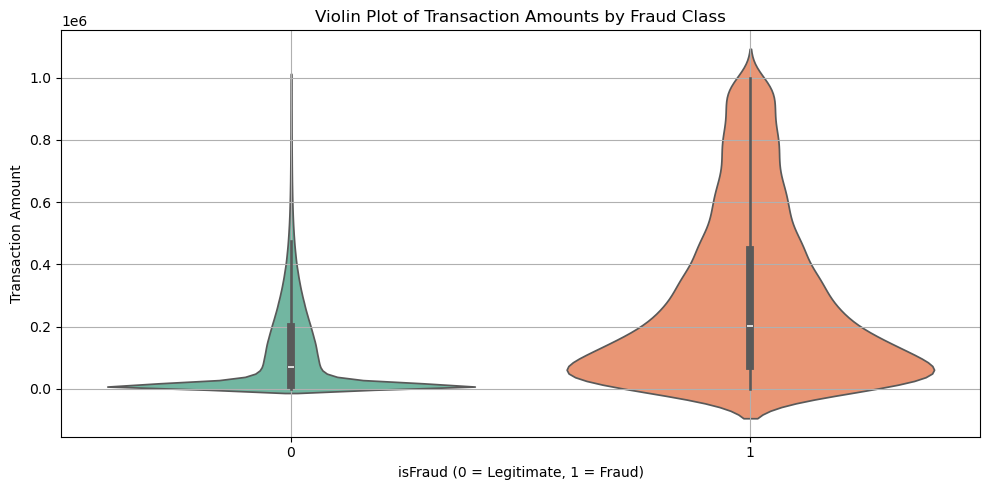

In [ ]:
# 🔍 Distribution of transaction amounts (log scale for better visibility)
plt.figure(figsize=(10, 5))
sns.violinplot(x='isFraud', y='amount', data=data[data['amount'] < 1e6], palette='Set2', scale='width')
plt.title('Violin Plot of Transaction Amounts by Fraud Class')
plt.xlabel('isFraud (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


## 💰 Account Balances Before and After Transactions


- These four columns represent the balances of the origin (sender) and destination (receiver) accounts before and after the transaction.
- Some key observations from `.describe()`:
  - **Min values = 0**: Many accounts have zero balances, which could be important (e.g. accounts sending money without funds).
  - **Max values** can go up to millions, especially for destination balances — could indicate high-risk accounts.
  - **Mean and std** suggest high variability and potential for **outliers**.
- 💡 Insight: These balances will be crucial for **feature engineering**, particularly for calculating inconsistencies like:
  - `errorBalanceOrig = newbalanceOrig + amount - oldbalanceOrg`
  - `errorBalanceDest = oldbalanceDest + amount - newbalanceDest`
- ⚠️ Note: Some transactions show no change in balances, which might indicate **fake or simulated movement** (a fraud signal).

In [ ]:
# 📊 Summary statistics of sender and receiver balances before and after transactions
balance_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[balance_cols].describe()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


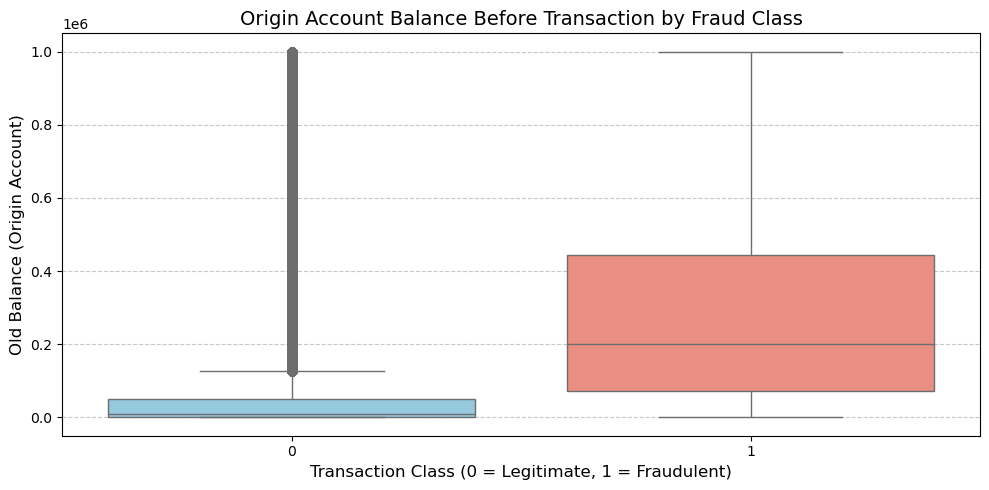

In [12]:
# 📦 Comparing sender's balance before transaction by fraud class (filtered for better visualization)
# Ensure isFraud is integer (not string)
data['isFraud'] = data['isFraud'].astype(int)

# Define palette with integer keys
palette = {0: "skyblue", 1: "salmon"}

# Plot with `hue` and `legend=False` to avoid warnings
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='isFraud',
    y='oldbalanceOrg',
    hue='isFraud',
    data=data[data['oldbalanceOrg'] < 1e6],
    palette=palette,
    legend=False
)
plt.title("Origin Account Balance Before Transaction by Fraud Class", fontsize=14)
plt.xlabel("Transaction Class (0 = Legitimate, 1 = Fraudulent)", fontsize=12)
plt.ylabel("Old Balance (Origin Account)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Fraudulent transactions (`isFraud = 1`) tend to originate from accounts with **high balances**.
# Many legitimate transactions also occur at low or even zero balances — possibly due to top-ups, microtransactions, or timing delays.
# There are more extreme values (larger balances) in the fraudulent group, indicating that **fraudsters often operate with high-value accounts** or simulate large transfers.
# ⚠️ Note: The plot is limited to balances under 1 million for readability.
# 💡 Insight: `oldbalanceOrg` is a **strong feature** when combined with `amount` and `newbalanceOrig`, especially when used in derived features like `errorBalanceOrig`.

## 🛠️ Balance Errors – Feature Engineering

- `errorBalanceOrig` measures if the origin account's post-transaction balance matches expectations:
  - `newbalanceOrig` should equal `oldbalanceOrg - amount`
  - Rearranged: `newbalanceOrig + amount - oldbalanceOrg` should ≈ 0 if correct
- Similarly, `errorBalanceDest` checks for inconsistencies in the destination account.

- 🔍 In the histogram:
  - Many fraudulent transactions show **non-zero errors**, often extreme.
  - This suggests **logical violations** like:
    - Transfers without sufficient funds
    - Balances that don't match the amount sent
    - Fabricated transactions where balances don’t change as expected

- 💡 Insight: These error features can strongly help the model distinguish **real transactions vs. simulated frauds**.

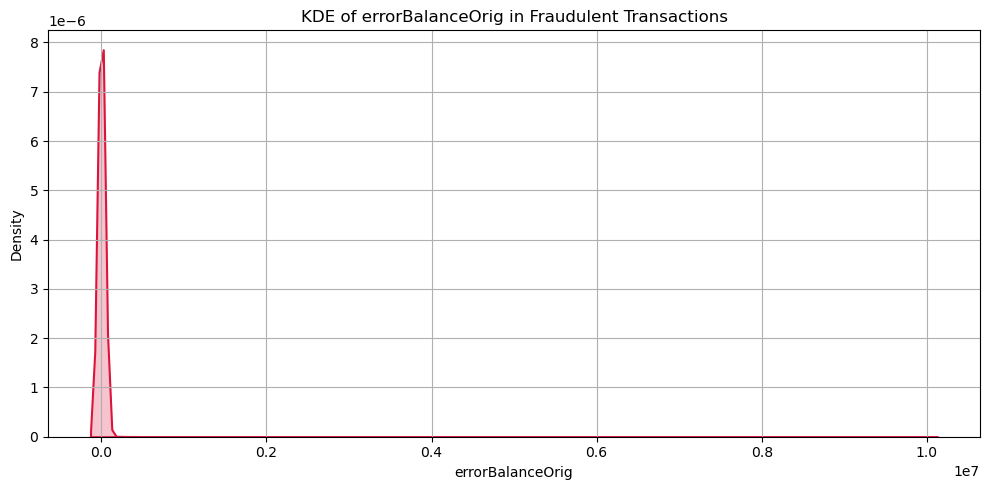

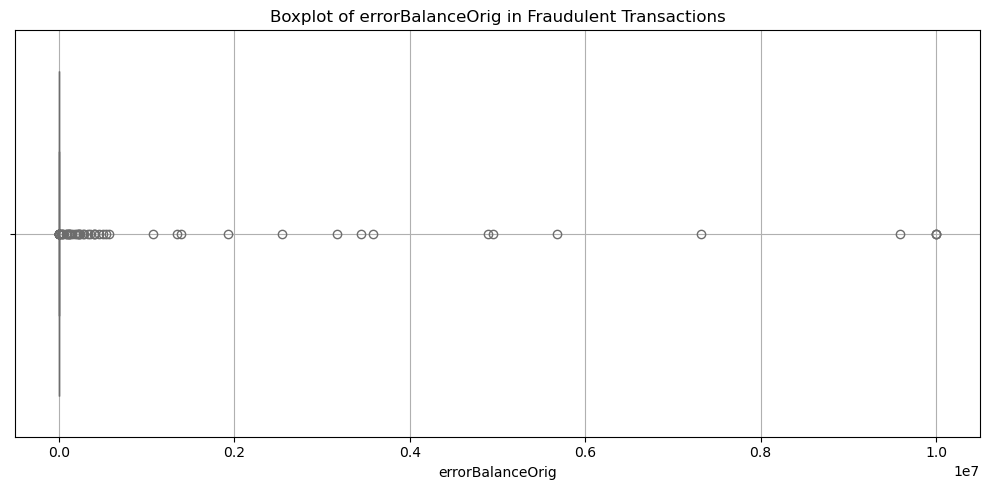

In [ ]:
# 🧮 Calculating balance inconsistencies (expected vs actual change in balances)
data['errorBalanceOrig'] = data['newbalanceOrig'] + data['amount'] - data['oldbalanceOrg']
data['errorBalanceDest'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']

# KDE Plot (Kernel Density Estimation)
plt.figure(figsize=(10, 5))
sns.kdeplot(
    data=data[data['isFraud'] == 1],
    x='errorBalanceOrig',
    fill=True,
    color='crimson',
    linewidth=1.5
)
plt.title("KDE of errorBalanceOrig in Fraudulent Transactions")
plt.xlabel("errorBalanceOrig")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot (to see concentration and outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='errorBalanceOrig',
    data=data[data['isFraud'] == 1],
    orient='h',
    color='salmon'
)
plt.title("Boxplot of errorBalanceOrig in Fraudulent Transactions")
plt.xlabel("errorBalanceOrig")
plt.grid(True)
plt.tight_layout()
plt.show()


## 👤 User Analysis – Originators and Destinations

- The dataset contains over **5.7 million unique origin accounts** and more than **2.7 million unique destination accounts**.
- This suggests that the **majority of users perform only a single transaction**, typical of a large-scale consumer app simulation.
- The top 10 most frequent originators show **repeat senders**, possibly:
  - High-volume customers,
  - Automated systems, or
  - Fraud rings using a small set of accounts.
- ⚠️ Since `nameOrig` and `nameDest` are masked (synthetic), we can't extract personal info, but **their frequency and behavior can be used as engineered features**:
  - e.g., number of transactions per account,
  - accounts that both send and receive,
  - accounts that only receive fraud.

Unique origin accounts: 6353307
Unique destination accounts: 2722362


/var/folders/zf/wj_jktvx4jb2w0ylv97cdxyh0000gn/T/ipykernel_3808/3958732249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_orig_accounts, x='count', y='nameOrig', palette='Blues_r')


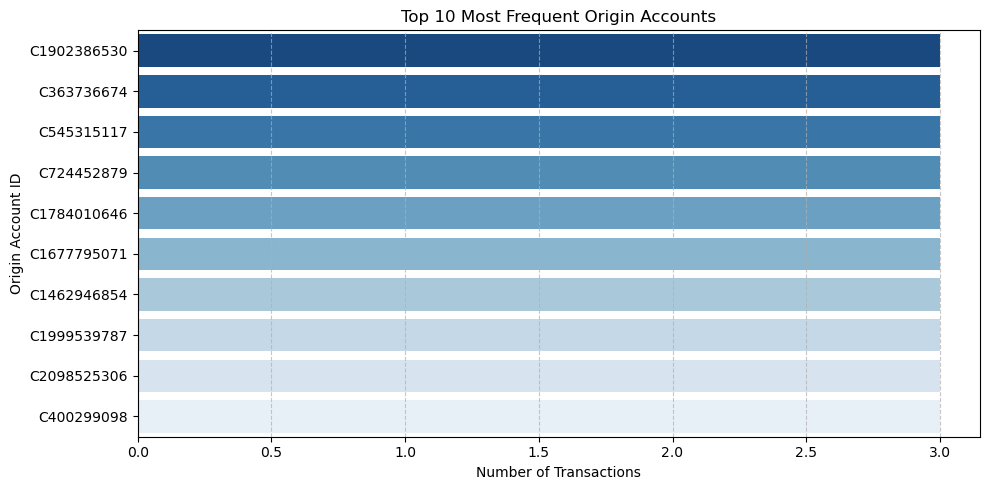

In [ ]:
# Count top 10 most frequent origin accounts
top_orig_accounts = data['nameOrig'].value_counts().head(10).reset_index()
top_orig_accounts.columns = ['nameOrig', 'count']

n_orig_accounts = data['nameOrig'].nunique()
n_dest_accounts = data['nameDest'].nunique()

print("Unique origin accounts:", n_orig_accounts)
print("Unique destination accounts:", n_dest_accounts)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_orig_accounts, x='count', y='nameOrig', palette='Blues_r')
plt.title("Top 10 Most Frequent Origin Accounts")
plt.xlabel("Number of Transactions")
plt.ylabel("Origin Account ID")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🕒 Time Step Analysis – When Does Fraud Happen?


- The `step` variable represents **time in hours** from the beginning of the simulation.
- Fraudulent transactions appear to have **specific peaks**, especially around certain steps — these could represent vulnerable periods or **strategic attack windows**.
- Legitimate transactions are distributed more evenly across time.

- 💡 Insights:
  - Some time periods may be more **fraud-prone** — e.g., when monitoring systems are weaker (early steps).
  - You can **engineer a temporal feature**, such as:
    - Is this step in a high-risk window?
    - Time of day category (morning/afternoon/night)?
- This temporal information could be useful for **real-time detection models** or simulations.

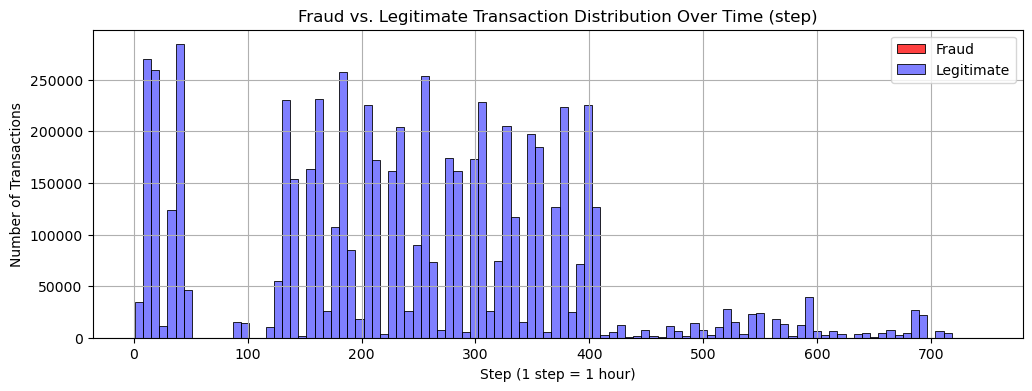

In [ ]:
# 📊 Fraud vs Legitimate transactions over time (step = hour in simulation)
plt.figure(figsize=(12, 4))

# Fraudulent transactions
sns.histplot(
    data[data['isFraud'] == 1]['step'],
    bins=100,
    color='salmon',
    label='Fraud',
    kde=False
)

# Legitimate transactions
sns.histplot(
    data[data['isFraud'] == 0]['step'],
    bins=100,
    color='skyblue',
    alpha=0.5,
    label='Legitimate',
    kde=False
)

plt.legend()
plt.title("Fraud vs. Legitimate Transaction Distribution Over Time (step)")
plt.xlabel("Step (1 step = 1 hour)")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()


## 🔗 Correlation Matrix – Numeric Features vs Fraud

- The correlation matrix shows how numeric features relate to each other and to `isFraud`.
- Key observations:
  - `amount` has a **moderate positive correlation (~0.40)** with `isFraud`, which aligns with earlier findings: larger amounts are more likely fraudulent.
  - `oldbalanceOrg` is also **positively correlated** (~0.35) — fraud often originates from accounts with high balances.
  - `newbalanceOrig` and `newbalanceDest` show **lower or negative correlation**, possibly due to inconsistent updates or simulation logic.

- ⚠️ Caveat:
  - Correlation only captures **linear** relationships. Non-linear patterns (which are common in fraud) won’t show here.
  - It's still useful for **feature selection** and early insights.

- 💡 Insight: Features like `amount` and `oldbalanceOrg` are valuable inputs for the model, while others like `newbalanceDest` may require more sophisticated engineering to reveal fraud signals.

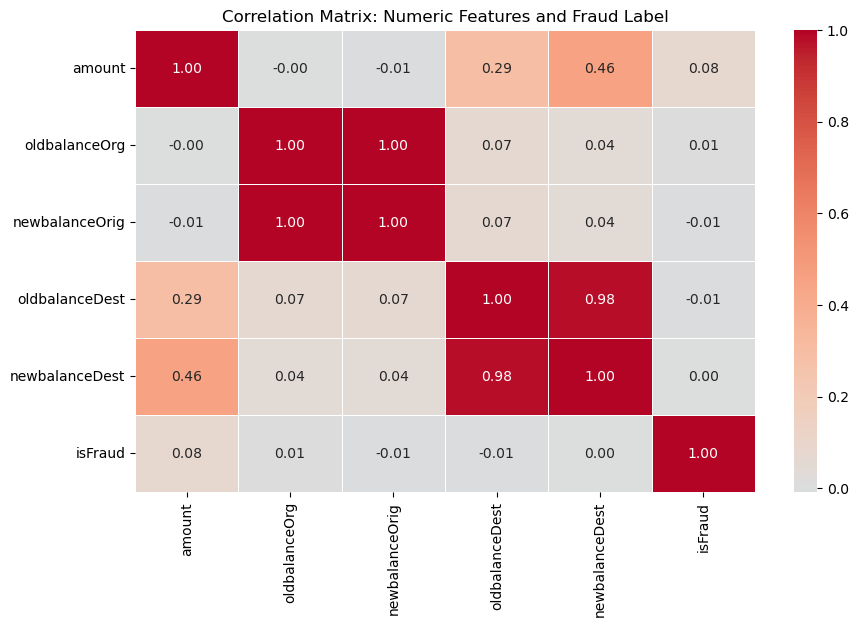

In [ ]:
# 🔍 Correlation matrix for numeric features and `isFraud`
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(10, 6))
sns.heatmap(
    data[numeric_cols + ['isFraud']].corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix: Numeric Features and Fraud Label")
plt.show()

## ✅ Summary and Key Decisions for Modeling

After performing a complete exploratory data analysis (EDA), we can now outline the key insights and define the next steps in our fraud detection pipeline:

---

#### 📌 What columns are valuable?
- **High-value features** identified during EDA include:
  - `amount`: Fraudulent transactions usually involve large sums.
  - `oldbalanceOrg`: High sender balances are correlated with fraud.
  - `type`: Only certain transaction types are fraud-prone.
  - `isFraud`: Target variable.
- **Low-value or filtered columns**:
  - `nameOrig`, `nameDest`: IDs useful only for frequency tracking or grouping.
  - `isFlaggedFraud`: Rarely triggered, not very informative.

---

#### ✂️ Should we filter out irrelevant transaction types?
- ✅ **Yes.** Fraud is found almost exclusively in:
  - `TRANSFER`
  - `CASH_OUT`
- We will **filter out** other types (`PAYMENT`, `CASH_IN`, `DEBIT`) to reduce noise and focus on relevant patterns.

---

#### 🛠️ Should we create new variables?
- ✅ **Yes.** Feature engineering improves the model's ability to detect fraud:
  - `errorBalanceOrig`, `errorBalanceDest`: Logical inconsistencies.
  - Flags for zero or unchanged balances.
  - Proportional features like `amount_to_balance_ratio`.
  - Outlier detection (e.g. z-score for `amount`).

---

#### ⚖️ What technique should we use for class imbalance?
- The dataset is **highly imbalanced** (~0.13% fraud).
- We will apply:
  - **SMOTETomek**: Synthetic oversampling + cleaning of borderline noise.
  - **Class weighting**: For models like Random Forest or XGBoost.
  - **Precision/Recall-oriented metrics** for evaluation instead of accuracy.

---

### 🚀 Next Step:
Move on to Step 2 of the pipeline:
**Filter and clean the dataset**, followed by **feature engineering and model training**.